### 1. For the boston dataset given in HW2, create a heatmap with all the features - 1 point

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.datasets import load_boston
boston = load_boston()

In [2]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [3]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [4]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [5]:
boston_pd = pd.DataFrame(boston.data, columns = boston.feature_names)
boston_pd.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


From above we can observe target is not included in the original dataset. To plot heatmap against all features including target, we have to add target to the dataset.

In [6]:
boston_cpy = boston_pd.copy()  # copy of original boston dataset

boston_cpy['MEDV'] = boston.target # attach target data to boston_cpy
boston_cpy.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


Now we have all the features for a perfect heatmap

<AxesSubplot:>

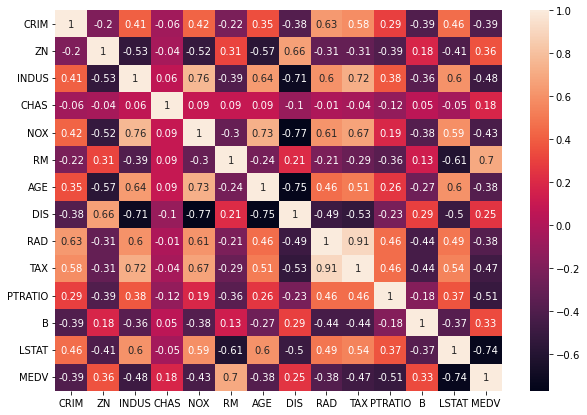

In [7]:
correlation_matrix = boston_cpy.corr().round(2)
plt.figure(figsize = (10,7))
sns.heatmap(data = correlation_matrix, annot = True)

Observation : 
 - RM has high positive correlation (0.7) and LSTAT has high negative correlation (-0.74) with the target MEDV.

### 2. Apply feature selection on the dataset. Try to find the top k features which improves the score in the next questions - 1 point each

Using scatter plot we can identify the top k features.

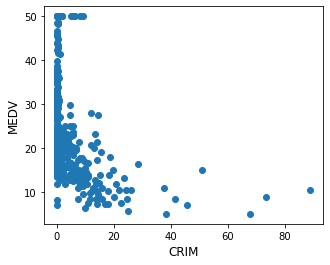

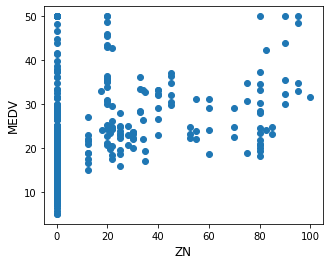

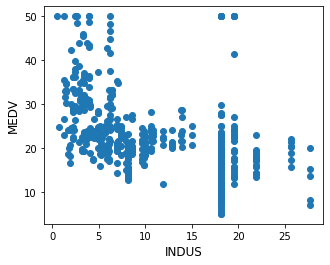

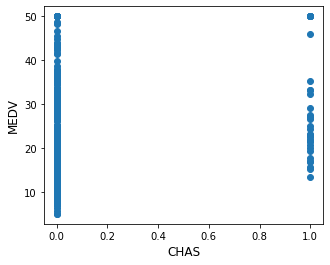

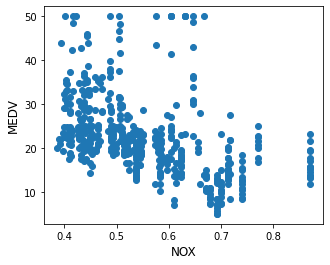

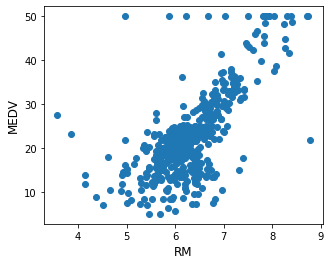

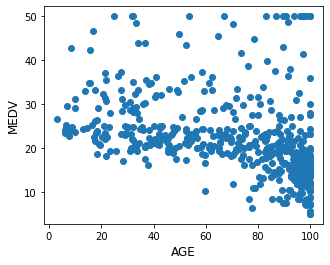

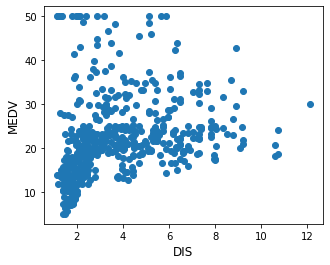

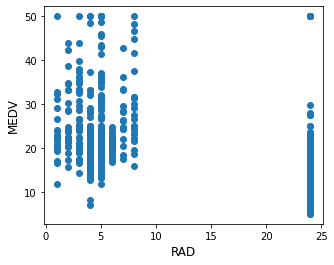

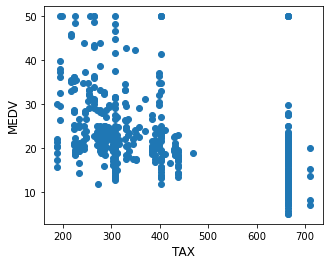

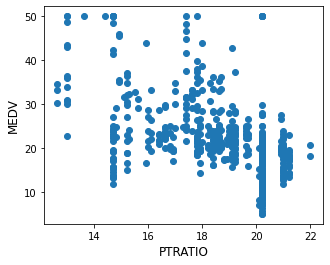

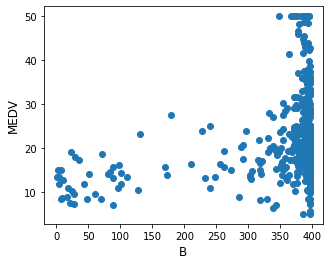

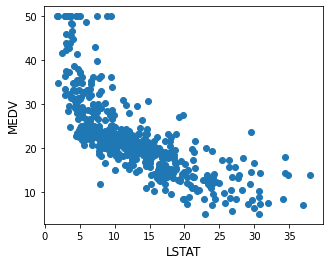

In [8]:
for index, feature_name in enumerate(boston.feature_names):
    plt.figure(figsize=(5, 4))
    plt.scatter(boston.data[:, index], boston.target)
    plt.ylabel('MEDV', size=12)
    plt.xlabel(feature_name, size=12)
    plt.show()

Observstion from heatmap and scatterplot :

 - Top 2 features which affects the target variable are RM and LSTAT
 - As the value of RM increases MEDV increases linearly. Though, data seems to have some outliers.
 - As the value of LSTSAT increases MEDV decreases. 

### 3. Apply Linear regression and Ridge regression and plot the coefficient for each feature. Try different aplha values as well and comment what do you observe. -3 points

Use different marker for each model if plotting in same figure.

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

y = boston_cpy['MEDV']

X = boston_cpy.iloc[:,0:13]

# Linear Regression
lm = LinearRegression()
lm.fit( X, y)

# Coefficients dataframe
pd.DataFrame( list(zip(X.columns, lm.coef_)),
            columns=['features', 'estimatedCoeffs'])



,features,estimatedCoeffs
0,CRIM,-0.108011
1,ZN,0.046420
2,INDUS,0.020559
3,CHAS,2.686734
4,NOX,-17.766611
5,RM,3.809865
6,AGE,0.000692
7,DIS,-1.475567
8,RAD,0.306049
9,TAX,-0.012335


Observation:
 - The Estimated coefficients of our top 2 features RM and LSTAT are 3.8 and  -0.5 respectively.
 - In RM we observe, it has a high positive correlation with target. One unit increase in MEDV increases 3.8 unit in RM.
 - Similarly, LSTAT has a negative correlation with target.

# Coefficient plot

In [12]:
import statsmodels.api as sm
from statsmodels.api import add_constant

In [15]:
# Multiple linear regression analysis using OLS to plot coefficients.

X = sm.add_constant(X)
model1 = sm.OLS(y,X)
results = model1.fit()

print(f"Mse: {results.mse_resid}")

results.summary()

Mse: 22.51785483324182


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Wed, 15 Sep 2021   Prob (F-statistic):          6.72e-135
Time:                        09:59:28   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4595      5.103      7.144      0.000      26.432      46.487
CRIM          -0.1080      0.033     -3.287      0.001      -0.173      -0.043
ZN             0.0464      0.014      3.382      0.001       0.019       0.073
INDUS          0.0206      0.061      0.334      0.738      -0.100       0.141
CHAS           2.6867      0.862      3.118      0.002       0.994       4.380
NOX          -17.7666      3.820     -4.651      0.000     -25.272     -10.262
RM             3.8099      0.418      9.116      0.000       2.989       4.631
AGE            0.0007      0.013      0.052      0.958      -0.025       0.027
DIS           -1.4756      0.199     -7.398      0.000      -1.867      -1.084
RAD            0.3060      0.066      4.613      0.000       0.176       0.436
TAX           -0.0123      0.004     -3.280      0.001      -0.020      -0.005
PTRATIO       -0.9527      0.131     -7.283      0.000      -1.210      -0.696
B              0.0093      0.003      3.467      0.001       0.004       0.015
LSTAT         -0.5248      0.051    -10.347      0.000      -0.624      -0.425
==============================================================================
Omnibus:                      178.041   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.126
Skew:                           1.521   Prob(JB):                    8.84e-171
Kurtosis:                       8.281   Cond. No.                     1.51e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [30]:
# Funtion for coefplot

def coefplot(results):
    coef_df = pd.DataFrame(results.summary().tables[1].data)
    coef_df.columns = coef_df.iloc[0]
    coef_df = coef_df.drop(0)
    coef_df = coef_df.set_index(coef_df.columns[0])
    coef_df = coef_df.astype(float)
    errors = coef_df['coef'] - coef_df['[0.025']
    coef_df['errors'] = errors
    coef_df = coef_df.drop(['const'])
    coef_df = coef_df.sort_values(by=['coef'])
    
    variables = list(coef_df.index.values)
    coef_df['variables'] = variables
    sns.set_context("poster")
    fig, ax = plt.subplots(figsize=(15, 10))
    coef_df.plot(x='variables', y='coef', kind='bar',
                 ax=ax, color='none', fontsize=22, 
                 ecolor='steelblue',capsize=0,
                 yerr='errors', legend=False)
    plt.title('Coefficients of Features w/ 95% Confidence Intervals',fontsize=30)
    ax.set_ylabel('Coefficients',fontsize=22)
    ax.set_xlabel('',fontsize=22)
    ax.scatter(x=np.arange(coef_df.shape[0]), 
               marker='o', s=80, 
               y=coef_df['coef'], color='steelblue')
    ax.axhline(y=0, linestyle='--', color='red', linewidth=1)
    return plt.show()

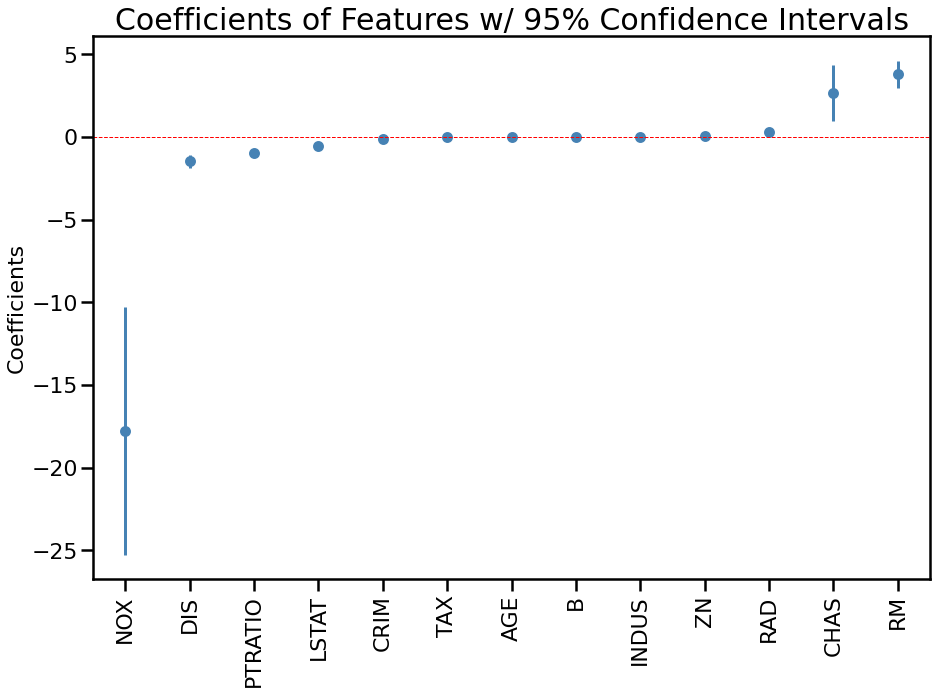

In [31]:
coefplot(results)

In [35]:
from sklearn import linear_model
from sklearn.linear_model import Ridge

# Alpha = 0.5
reg = linear_model.Ridge(alpha=0.5)
reg.fit(X, y)

pd.DataFrame( list(zip(X.columns, reg.coef_)),
            columns=['features', 'estimatedCoeffs'])

,features,estimatedCoeffs
0,const,0.000000
1,CRIM,-0.105866
2,ZN,0.047041
3,INDUS,0.002252
4,CHAS,2.612117
5,NOX,-13.416261
6,RM,3.840757
7,AGE,-0.003144
8,DIS,-1.411491
9,RAD,0.295989


In [36]:
# Alpha = 5
reg = linear_model.Ridge(alpha=5)
reg.fit(X, y )

pd.DataFrame( list(zip(X.columns, reg.coef_)),
            columns=['features', 'estimatedCoeffs'])

,features,estimatedCoeffs
0,const,0.000000
1,CRIM,-0.101799
2,ZN,0.048783
3,INDUS,-0.035897
4,CHAS,2.229483
5,NOX,-4.185995
6,RM,3.812647
7,AGE,-0.010329
8,DIS,-1.275862
9,RAD,0.278791


In [37]:
# Alpha = 40
reg = linear_model.Ridge(alpha=40)
reg.fit(X, y )

pd.DataFrame( list(zip(X.columns, reg.coef_)),
            columns=['features', 'estimatedCoeffs'])

,features,estimatedCoeffs
0,const,0.000000
1,CRIM,-0.102135
2,ZN,0.052207
3,INDUS,-0.050110
4,CHAS,1.141460
5,NOX,-0.656243
6,RM,3.097016
7,AGE,-0.006278
8,DIS,-1.209976
9,RAD,0.296264


In [38]:
# Alpha = 1000
reg = linear_model.Ridge(alpha=1000)
reg.fit(X, y )

pd.DataFrame( list(zip(X.columns, reg.coef_)),
            columns=['features', 'estimatedCoeffs'])

,features,estimatedCoeffs
0,const,0.000000
1,CRIM,-0.090768
2,ZN,0.054378
3,INDUS,-0.036336
4,CHAS,0.101449
5,NOX,-0.016001
6,RM,0.568555
7,AGE,0.030573
8,DIS,-0.612628
9,RAD,0.310743


In [39]:
# Alpha = 5000
reg = linear_model.Ridge(alpha=50000)
reg.fit(X, y )

pd.DataFrame( list(zip(X.columns, reg.coef_)),
            columns=['features', 'estimatedCoeffs'])

,features,estimatedCoeffs
0,const,0.000000
1,CRIM,-0.042312
2,ZN,0.056734
3,INDUS,-0.030232
4,CHAS,0.003697
5,NOX,-0.000141
6,RM,0.028831
7,AGE,-0.006507
8,DIS,-0.024541
9,RAD,0.038829


Text(0.5, 1.0, 'Ridge Coefficients vs Regularization Parameters')

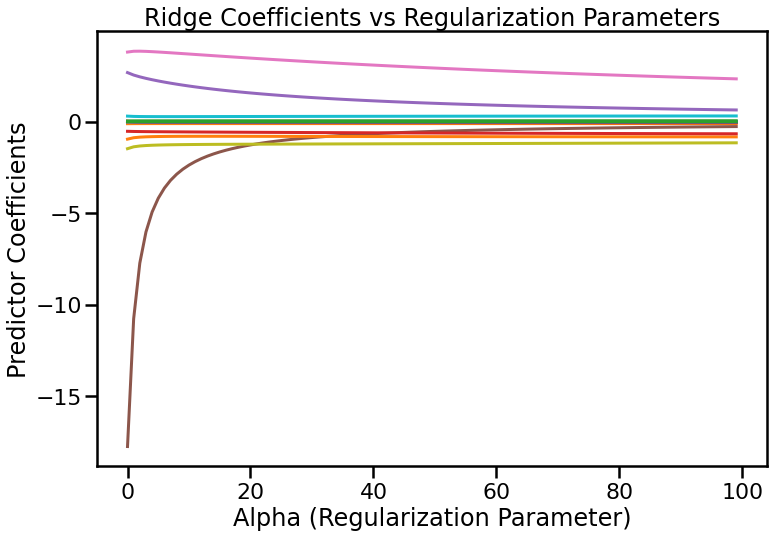

In [40]:
# Ridge Regression ALPHA vs COEFFICIENT
coef=[]
alphas = range(0,100)

for a in alphas:
  ridgereg=Ridge(alpha=a)
  ridgereg.fit(X, y)
  coef.append(ridgereg.coef_)

fig=plt.figure(figsize=(12, 8))
ax=fig.add_subplot(111)
ax.plot(alphas,coef)
ax.set_xlabel('Alpha (Regularization Parameter)')
ax.set_ylabel('Predictor Coefficients')
ax.set_title('Ridge Coefficients vs Regularization Parameters')

Observation:
 - We can see by increasing the alpha the coefficients are reducing.
 - By increasing alpha one of the top feature(RM) is reduced nearly to original, by punishing the larger coefficient. This avoids overfitting and can generalise new unseen data.
 - In the above plot we can see as the alpha increases the coefficients convert to smaller values. By having smaller coefficients we can limit the collinearity between predictors.

### 4. Use the HCC.csv file. Split the data into 70:30. Apply Ridge and lasso regression on the data to predict alive or dead. -5 points

In this question you are expected to figure out the difference between the two regularization technique as well as when to use which. Comment your findings. Try plotting coefficents as well for better understanding.

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data= pd.read_csv(r"C:\Users\janah\Desktop\ML - 257\Assignments\HW3\Homework3\HCC.csv")

In [19]:
pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)
data.head()

,Unnamed: 0,1.Gen,2.Sym,3.Alc,4.HepB,6.HepB,7.HepC,8.Cir,11.Dia,12.Obe,13.Hem,14.Art,15.CRen,16.HIV,17.Non,19.Spl,20.PHyp,21.Thr,22.LMet,23.Rad,24.Agedia,27.Sta,28.Encdeg,29.Ascdeg,30.IntNorRat,31.Alp,32.Hae,33.MCorVol,34.Leu,35.Plat,36.Alb,37.Bil,38.Ala,39.Aspa,40.Gam,41.Alk,42.Prot,43.Crea,44.NNod,45.dnod,Class
0,0,1,0.0,1,0.0,0.0,0.0,1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,67,0,1.0,1.0,1.53,95.0,13.7,106.6,4.9,99.0,3.4,2.1,34.0,41,183.0,150.0,7.1,0.70,1.0,3.5,1
1,2,1,0.0,1,1.0,1.0,0.0,1,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,78,2,1.0,2.0,0.96,5.8,8.9,79.8,8.4,472.0,3.3,0.4,58.0,68,202.0,109.0,7.0,2.10,5.0,13.0,1
2,3,1,1.0,1,0.0,0.0,0.0,1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,77,0,1.0,1.0,0.95,2440.0,13.4,97.1,9.0,279.0,3.7,0.4,16.0,64,94.0,174.0,8.1,1.11,2.0,15.7,0
3,4,1,1.0,1,1.0,1.0,0.0,1,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,76,0,1.0,1.0,0.94,49.0,14.3,95.1,6.4,199.0,4.1,0.7,147.0,306,173.0,109.0,6.9,1.80,1.0,9.0,1
4,5,1,0.0,1,0.0,0.0,0.0,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,75,1,1.0,2.0,1.58,110.0,13.4,91.5,5.4,85.0,3.4,3.5,91.0,122,242.0,396.0,5.6,0.90,1.0,10.0,0


In [20]:
data.shape

(156, 41)

In [22]:
X = data.iloc[:,1:40]
y = data['Class']

X.head()

,1.Gen,2.Sym,3.Alc,4.HepB,6.HepB,7.HepC,8.Cir,11.Dia,12.Obe,13.Hem,14.Art,15.CRen,16.HIV,17.Non,19.Spl,20.PHyp,21.Thr,22.LMet,23.Rad,24.Agedia,27.Sta,28.Encdeg,29.Ascdeg,30.IntNorRat,31.Alp,32.Hae,33.MCorVol,34.Leu,35.Plat,36.Alb,37.Bil,38.Ala,39.Aspa,40.Gam,41.Alk,42.Prot,43.Crea,44.NNod,45.dnod
0,1,0.0,1,0.0,0.0,0.0,1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,67,0,1.0,1.0,1.53,95.0,13.7,106.6,4.9,99.0,3.4,2.1,34.0,41,183.0,150.0,7.1,0.70,1.0,3.5
1,1,0.0,1,1.0,1.0,0.0,1,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,78,2,1.0,2.0,0.96,5.8,8.9,79.8,8.4,472.0,3.3,0.4,58.0,68,202.0,109.0,7.0,2.10,5.0,13.0
2,1,1.0,1,0.0,0.0,0.0,1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,77,0,1.0,1.0,0.95,2440.0,13.4,97.1,9.0,279.0,3.7,0.4,16.0,64,94.0,174.0,8.1,1.11,2.0,15.7
3,1,1.0,1,1.0,1.0,0.0,1,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,76,0,1.0,1.0,0.94,49.0,14.3,95.1,6.4,199.0,4.1,0.7,147.0,306,173.0,109.0,6.9,1.80,1.0,9.0
4,1,0.0,1,0.0,0.0,0.0,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,75,1,1.0,2.0,1.58,110.0,13.4,91.5,5.4,85.0,3.4,3.5,91.0,122,242.0,396.0,5.6,0.90,1.0,10.0


In [23]:
# Feature Scaling

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [24]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [25]:
# Ridge Regression

from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error,mean_squared_error

# Trying ridge regression with random alpha value

ridge_model = Ridge(alpha = 10)   

ridge_model.fit(X_train,y_train)

test_pred = ridge_model.predict(X_test)

In [27]:
# Training Set Performance
train_predictions = ridge_model.predict(X_train)
MAE = mean_absolute_error(y_train,train_predictions)
MAE

0.2631891003656468

In [28]:
MAE = mean_absolute_error(y_test,test_pred) 
MSE = mean_squared_error(y_test,test_pred)
RMSE = np.sqrt(MSE)

In [29]:
MAE 

0.38170455788398044

In [30]:
RMSE

0.45739205667869814

In [31]:
# Ridge Regression with CV

from sklearn.linear_model import RidgeCV

ridge_cv_model = RidgeCV(alphas=(0.1, 1.0, 10.0,20.0,50.0,100.0),scoring='neg_mean_absolute_error')

In [32]:
ridge_cv_model.fit(X_train,y_train)

RidgeCV(alphas=array([  0.1,   1. ,  10. ,  20. ,  50. , 100. ]),
        scoring='neg_mean_absolute_error')

In [33]:
ridge_cv_model.alpha_

50.0

In [34]:
test_pred = ridge_cv_model.predict(X_test)

MAE = mean_absolute_error(y_test,test_pred)
MSE = mean_squared_error(y_test,test_pred)
RMSE = np.sqrt(MSE)

In [35]:
MAE  

0.3870687474687217

In [36]:
RMSE    # less error compared to normal ridge with random alpha

0.43990691003975696

In [37]:
# Training Set Performance
train_predictions = ridge_cv_model.predict(X_train)
MAE = mean_absolute_error(y_train,train_predictions)
MAE

0.29675950185312194

In [38]:
ridge_cv_model.coef_

array([-0.00433995, -0.03227232, -0.0140526 ,  0.03123626, -0.0264573 ,
       -0.03811221,  0.01911557, -0.04836823,  0.01540372, -0.01449833,
        0.08479509,  0.02871488, -0.01375294,  0.02511601, -0.00611327,
        0.03791724, -0.01744643, -0.04704706,  0.01129011, -0.05924878,
       -0.04954027,  0.01751813, -0.03725254, -0.0275472 ,  0.0439761 ,
        0.08879293, -0.0043699 , -0.01449004, -0.02303812,  0.02695787,
       -0.03605019,  0.03307683, -0.05666961, -0.02309597, -0.03436713,
       -0.04559095, -0.03502623, -0.02245772, -0.03611058])

In [39]:
# Lasso Regression

from sklearn.linear_model import LassoCV

lasso_cv_model = LassoCV()

lasso_cv_model.fit(X_train,y_train)

LassoCV()

In [40]:
lasso_cv_model.alpha_ # uses default eps = 0.001 and n_alphas = 100 to find alpha

0.11271166389810486

In [41]:
test_predictions = lasso_cv_model.predict(X_test)

In [42]:
MAE = mean_absolute_error(y_test,test_predictions)
MSE = mean_squared_error(y_test,test_predictions)
RMSE = np.sqrt(MSE)

In [43]:
MAE

0.46132423312170673

In [44]:
RMSE

0.47853116447971544

In [45]:
# Training Set Performance
train_predictions = lasso_cv_model.predict(X_train)
MAE = mean_absolute_error(y_train,train_predictions)
MAE

0.4334378492759607

In [46]:
lasso_cv_model.coef_

array([-0.        , -0.        , -0.        ,  0.        , -0.        ,
       -0.        ,  0.        , -0.        , -0.        , -0.        ,
        0.        ,  0.        , -0.        ,  0.        , -0.        ,
       -0.        , -0.        , -0.01180045,  0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        ,  0.        ,
        0.09743016, -0.        , -0.        , -0.        ,  0.        ,
       -0.        ,  0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        ])

Observation:
 - RidgeCV MAE : 0.38, RMSE : 0.43
 - LassoCV MAE : 0.46, RMSE : 0.47
 - From the above result we observe ridgecv performs better than lassocv.
 - In ridge all the coefficients are penalized which is hard to interpret the model.
 - In lasso only two coefficients are penalized which makes the model easy to interpret, by giving more alpha values to compute the model becomes more complex. It uses more coefficients to find the best alpha value.
 - So, with just two coefficients lasso gives a satisfying score but ridge has better performance comparitively.
 - In conlusion, lasso can be used when only few predictors influence the response and ridge can be used when most predictors impact the response.